# Explore here

Regresión Lineal

Objeivo:  calcular, en función de datos fisológicos de los clientes cuál va a ser la prima (coste) que se debe asumir por cada uno de ellos.

In [34]:
# Your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

data.shape

(1338, 7)

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
print(f"Filas Duplicadas: {data.duplicated().sum()}")

Filas Duplicadas: 1


In [6]:
data = data.drop_duplicates()

In [7]:
print(f"Filas Duplicadas: {data.duplicated().sum()}")

Filas Duplicadas: 0


In [8]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [11]:
print(data.nunique())

print(data.sex.unique());
print(data.smoker.unique())

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64
['female' 'male']
['yes' 'no']


In [12]:
# Tranformar los valores de "Sex" y "Smoker" a binarios numéricos

sex_binario = [0 if x == "female" else 1 for x in data.sex]

data.drop("sex", axis=1)
data["sex"] = sex_binario

fum_binario = [0 if x == "no" else 1 for x in data.smoker]
data.drop("smoker", axis=1)
data["smoker"] = fum_binario

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [13]:
#Transformación de "Region" a numérico.

data["region_n"] = pd.factorize(data.region)[0]

reg_values = data.region
reg_codes= data.region_n

map_region = dict(zip(reg_values, reg_codes))
print(map_region)

data.head()

{'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}


,age,sex,bmi,children,smoker,region,charges,region_n
0,19,0,27.900,0,1,southwest,16884.92400,0
1,18,1,33.770,1,0,southeast,1725.55230,1
2,28,1,33.000,3,0,southeast,4449.46200,1
3,33,1,22.705,0,0,northwest,21984.47061,2
4,32,1,28.880,0,0,northwest,3866.85520,2


In [14]:
data= data.drop("region", axis=1)
data.apply(lambda x: x.skew())

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
charges     1.515391
region_n    0.039068
dtype: float64

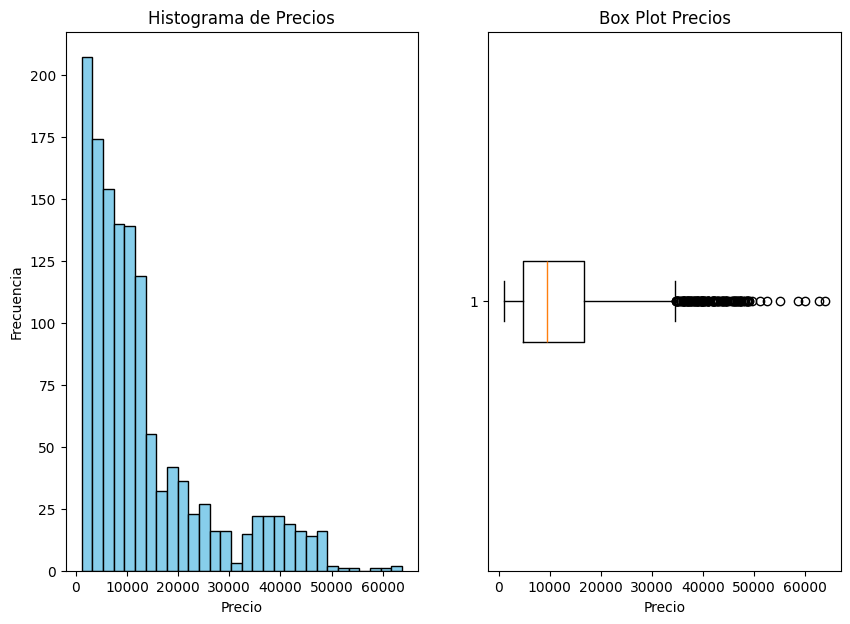

In [15]:
# Gráfico de la Variable Objetivo

fig, axis = plt.subplots(1, 2, figsize=(10,7));

axis[0].hist(data.charges,bins=30, color="skyblue", edgecolor = "black");
axis[0].set_title('Histograma de Precios');
axis[0].set_xlabel('Precio');
axis[0].set_ylabel('Frecuencia');

axis[1].boxplot(data.charges, vert= False)
axis[1].set_title("Box Plot Precios")
axis[1].set_xlabel("Precio");

In [16]:
#Búsqueda de valores <= 0 para aplicar log.
sum(data.charges <= 0)

0

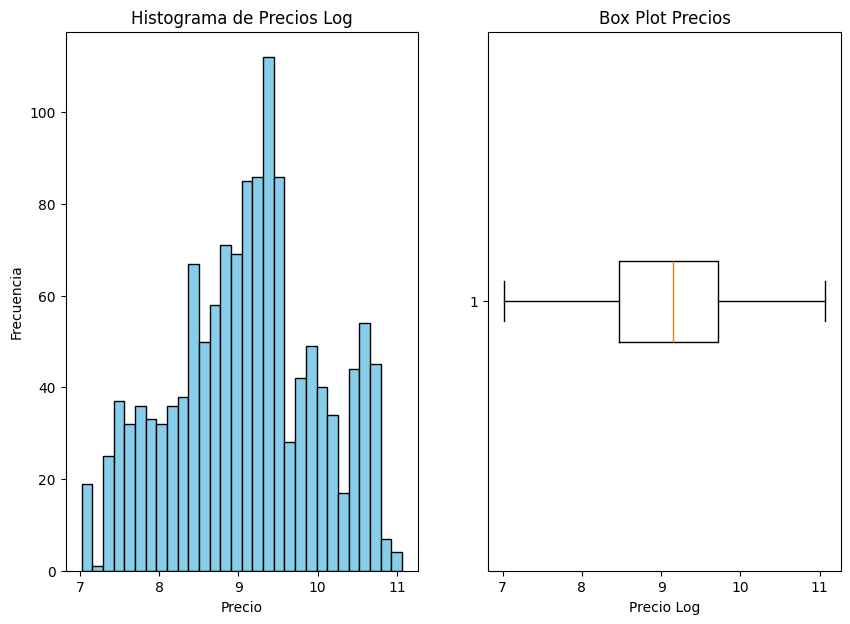

In [17]:
#Transformación de la variable objetivo a su escala Log.
data["log_charges"] = np.log(data.charges)

#Graficación de Resultados

fig, axis = plt.subplots(1, 2, figsize=(10,7));

axis[0].hist(data.log_charges,bins=30, color="skyblue", edgecolor = "black");
axis[0].set_title('Histograma de Precios Log');
axis[0].set_xlabel('Precio');
axis[0].set_ylabel('Frecuencia');

axis[1].boxplot(data.log_charges, vert= False)
axis[1].set_title("Box Plot Precios")
axis[1].set_xlabel("Precio Log");

In [18]:
data.isna().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
charges        0
region_n       0
log_charges    0
dtype: int64

Análisis de características en relación al Objetivo.

In [19]:
#Correlación de Características (Pearson)

corr = data.corr()
corr.style.background_gradient(cmap="coolwarm").format(precision=3)

,age,sex,bmi,children,smoker,charges,region_n,log_charges
age,1.000,-0.020,0.109,0.042,-0.026,0.298,-0.002,0.527
sex,-0.020,1.000,0.046,0.018,0.077,0.058,-0.005,0.007
bmi,0.109,0.046,1.000,0.013,0.004,0.198,-0.158,0.133
children,0.042,0.018,0.013,1.000,0.007,0.067,-0.016,0.160
smoker,-0.026,0.077,0.004,0.007,1.000,0.787,0.002,0.666
charges,0.298,0.058,0.198,0.067,0.787,1.000,0.007,0.893
region_n,-0.002,-0.005,-0.158,-0.016,0.002,0.007,1.000,0.043
log_charges,0.527,0.007,0.133,0.160,0.666,0.893,0.043,1.000


In [20]:
corr.log_charges

age            0.526927
sex            0.007009
bmi            0.132822
children       0.160336
smoker         0.665718
charges        0.893084
region_n       0.043393
log_charges    1.000000
Name: log_charges, dtype: float64

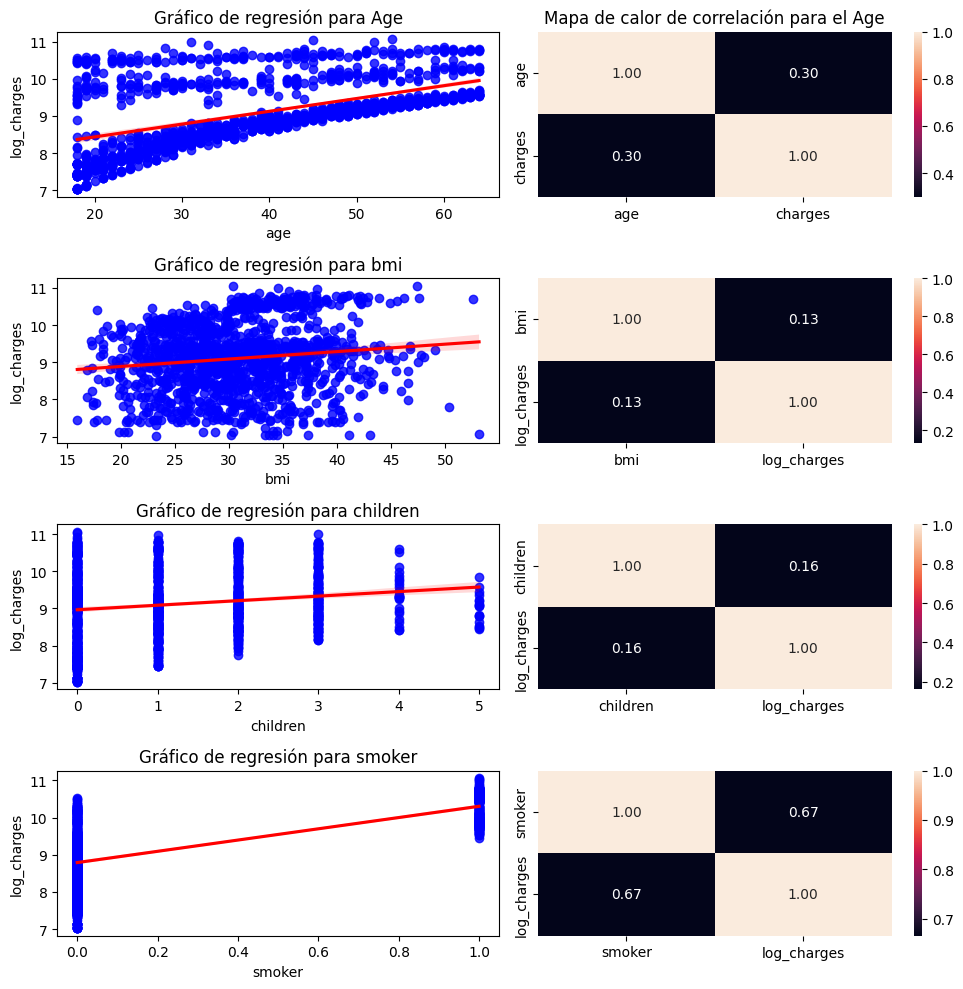

In [21]:
# Relación entre las Variables Predictoras No categóricas y las Variables Objetivo:


# Crear la figura y los ejes
fig, axes = plt.subplots(4, 2, figsize=(10, 10))

# Variable "AGE"
sns.regplot(x=data.age, y=data.log_charges, ax=axes[0, 0], line_kws={"color": "red"}, scatter_kws={"color": "blue"})
axes[0, 0].set_title('Gráfico de regresión para Age')
sns.heatmap(data[['age', 'charges']].corr(), annot=True, fmt='.2f', ax=axes[0,1], cbar=True)
axes[0,1].set_title('Mapa de calor de correlación para el Age')


#Variable bmi
sns.regplot(x=data.bmi, y=data.log_charges, ax=axes[1,0], line_kws={"color": "red"}, scatter_kws={"color": "blue"})
axes[1,0].set_title('Gráfico de regresión para bmi')
sns.heatmap(data[['bmi', 'log_charges']].corr(), annot=True, fmt='.2f', ax=axes[1, 1], cbar=True )

#Variable children       
sns.regplot(x=data.children, y=data.log_charges, ax=axes[2,0], line_kws={"color": "red"}, scatter_kws={"color": "blue"})
axes[2,0].set_title('Gráfico de regresión para children')
sns.heatmap(data[['children', 'log_charges']].corr(), annot=True, fmt='.2f', ax=axes[2, 1], cbar=True )

#Variable smoker         
sns.regplot(x=data.smoker, y=data.log_charges, ax=axes[3,0], line_kws={"color": "red"}, scatter_kws={"color": "blue"})
axes[3,0].set_title('Gráfico de regresión para smoker')
sns.heatmap(data[['smoker', 'log_charges']].corr(), annot=True, fmt='.2f', ax=axes[3, 1], cbar=True )



# Ajustar el diseño
plt.tight_layout()


plt.show()

In [23]:
data = data.drop(['sex' ,'region_n'], axis=1)

In [28]:
charges_original = data.charges
data = data.drop('charges', axis=1)

data

,age,bmi,children,smoker,log_charges
0,19,27.900,0,1,9.734176
1,18,33.770,1,0,7.453302
2,28,33.000,3,0,8.400538
3,33,22.705,0,0,9.998092
4,32,28.880,0,0,8.260197
...,...,...,...,...,...
1333,50,30.970,3,0,9.268661
1334,18,31.920,0,0,7.698927
1335,18,36.850,0,0,7.396233
1336,21,25.800,0,0,7.604867


In [24]:
#Cálculo de VIF -> Tengo dudillas al repecto (en la clase de EDA creo que el profesor hizo el VIF con los valores de corr. -> Es posible ?)

var_multico = data.drop(["charges", "log_charges"], axis=1)
var_multico = sm.add_constant(var_multico)

vif = pd.DataFrame()
vif["Variable"] = var_multico.columns
vif["VIF"] = [variance_inflation_factor(var_multico.values, i) for i in range(var_multico.shape[1])]

vif

,Variable,VIF
0,const,32.243043
1,age,1.014465
2,bmi,1.012213
3,children,1.001867
4,smoker,1.000768


Las variable no demuestran multicolinearidad.



A continuación divido el conjunto en Train y Test para luego instanaciar con Standar Scaler y estandarizar las variables. 
Para esto, antes deberé aislar las variables binarias y categóricas para luego volver a unirlo en un ds donde las variables numéricas estandarizadas queden unidads a las categóricas y las binarias. 

In [55]:
log_char = data.log_charges

scaler = MinMaxScaler()
var_scal = scaler.fit_transform(data)

data_scal = pd.DataFrame(var_scal, index = data.index, columns = data.columns)

data_scal




,age,bmi,children,smoker,log_charges
0,0.021739,0.321227,0.0,1.0,0.671096
1,0.000000,0.479150,0.2,0.0,0.106563
2,0.217391,0.458434,0.6,0.0,0.341011
3,0.326087,0.181464,0.0,0.0,0.736417
4,0.304348,0.347592,0.0,0.0,0.306275
...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.0,0.555877
1334,0.000000,0.429379,0.0,0.0,0.167357
1335,0.000000,0.562012,0.0,0.0,0.092438
1336,0.065217,0.264730,0.0,0.0,0.144077


In [57]:
data_scal.drop("log_charges", axis=1, inplace=True)
data_scal

In [58]:
if data_scal.index.equals(log_char.index):
    print("Los índices son iguales")
else:
    print("Los índices no son iguales")

Los índices son iguales


In [59]:
data_scal["log_charges"] = log_char
data_scal

,age,bmi,children,smoker,log_charges
0,0.021739,0.321227,0.0,1.0,9.734176
1,0.000000,0.479150,0.2,0.0,7.453302
2,0.217391,0.458434,0.6,0.0,8.400538
3,0.326087,0.181464,0.0,0.0,9.998092
4,0.304348,0.347592,0.0,0.0,8.260197
...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.0,9.268661
1334,0.000000,0.429379,0.0,0.0,7.698927
1335,0.000000,0.562012,0.0,0.0,7.396233
1336,0.065217,0.264730,0.0,0.0,7.604867


In [62]:
#Primero, separo los datos en Train y Test
X = data_scal.drop("log_charges", axis=1) 
Y = data_scal["log_charges"]



In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [67]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train)
model_fit = model.fit()


In [69]:
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     718.2
Date:                Sun, 07 Apr 2024   Prob (F-statistic):          8.98e-292
Time:                        21:37:01   Log-Likelihood:                -645.76
No. Observations:                1002   AIC:                             1302.
Df Residuals:                     997   BIC:                             1326.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7996      0.045    172.967      0.0